# Pymaceuticals Inc.


## Analysis

####  •	Based on the graphs of the tumor volume change for the 4 drugs Capomulin, Infubinol, Ketapril and Placebo, the tumor volume reduced by almost 20% for the mice treated with Capomulin over the period of 45 days. The volume increased in the rest of the mice treated with the other drugs.
#### •	The spread of the tumor location (metastatic sites) was much lower in the mice treated with Capomulin than the mice treated with the other drugs over the period of 45 days.
#### •	The survival rice of the mice treated with Capomulin was almost 85% compared to the mice treated with other drugs (~40%).


In [54]:
# Things to do
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


In [55]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import sem
from scipy import stats


In [56]:
# import clinical trial data
clinical_trial_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
len(clinical_trial_df)


1893

In [57]:
# drop duplicate data for Mouse ID g989 index 107, 329, 620, 815, 950
clinical_trial_df = clinical_trial_df.drop([107,329,620,815,950])
clinical_trial_df.reset_index()
len(clinical_trial_df)


1888

In [58]:
# import mouse drug data
mouse_drug_data_df = pd.read_csv('raw_data/mouse_drug_data.csv')
mouse_drug_data_df.head()
len(mouse_drug_data_df)

250

In [59]:
# drop duplicate mouse id g989 data from index 173
mouse_drug_data_df = mouse_drug_data_df.drop([173])
len(mouse_drug_data_df)


249

In [60]:
# merge both data on Mouse ID
all_data_df = pd.merge(clinical_trial_df, mouse_drug_data_df, on=["Mouse ID", "Mouse ID"], how='left')
print(len(all_data_df))

all_data_df.head()

1888


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [61]:
# creating a scatter plot that shows how the tumor volume changes over time for each treatment.

# calculate the standard error for Tumor Volume by Timepoint and Drug. Calculate sem() and unstack the data.
tumor_sem_df = all_data_df.groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].sem()
tumor_sem_unstack = tumor_sem_df.unstack()
tumor_sem_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.244017,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.440695,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.516125,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.650444,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [62]:
# calculate mean for mouse data by Drug and Timepoint and unstack the data
tumor_volume_df = all_data_df.groupby(["Timepoint", "Drug"])["Tumor Volume (mm3)"].mean()
tumor_volume_unstack = tumor_volume_df.unstack()
tumor_volume_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.474979,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.360148,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.538661,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,54.004459,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


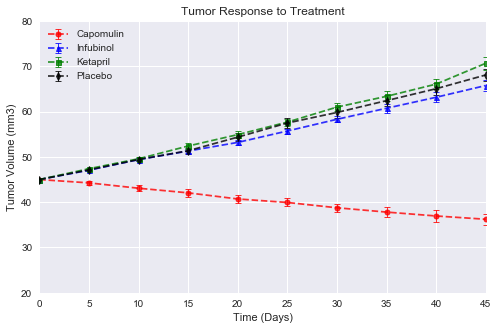

In [63]:
# use Seaborn library to set the size and look of the plot
sns.set_style("darkgrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,5)})

# x-axis for the plot
time = np.arange(0, 50, 5)

# assign y axis data and std error to variables.
# for volume
capomulin = tumor_volume_unstack["Capomulin"]
infubinol = tumor_volume_unstack["Infubinol"]
ketapril = tumor_volume_unstack["Ketapril"]
placebo = tumor_volume_unstack["Placebo"]
# std error
capomulin_sem = tumor_sem_unstack["Capomulin"]
infubinol_sem = tumor_sem_unstack["Infubinol"]
ketapril_sem = tumor_sem_unstack["Ketapril"]
placebo_sem = tumor_sem_unstack["Placebo"]

# plot the graph and error bars
plt.errorbar(time, capomulin, yerr=capomulin_sem, fmt='o', color='r', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
             markeredgewidth=1, linestyle='--', label="Capomulin")
plt.errorbar(time, infubinol, yerr=infubinol_sem, fmt='^', color='b', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
             markeredgewidth=1, linestyle='--', label="Infubinol")
plt.errorbar(time, ketapril, yerr=ketapril_sem, fmt='s', color='g', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
             markeredgewidth=1, linestyle='--', label="Ketapril")
plt.errorbar(time, placebo, yerr=placebo_sem, fmt='d', color='black', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
             markeredgewidth=1, linestyle='--', label="Placebo")

# set the x and y axis limits and labels, chart title and legends    
plt.xlim(0,45)
plt.ylim(20,80)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Save our graph and show the grap
plt.savefig('tumorVolume.png')
plt.show()

## Metastatic Response to Treatment

In [64]:
# Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) 
# (cancer spreading) sites changes over time for each treatment.

# print the data to be used
all_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [65]:
# Calculate the standard error for Metastatic Sites by Timepoint and Drug. Calculate sem() and unstack the data.
meta_sem_df = all_data_df.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].sem()
meta_sem_unstack = meta_sem_df.unstack()
meta_sem_unstack


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.090289,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.127412,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.160246,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.211200,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [66]:
# Calculate mean for Metastatic Data by Drug and Timepoint and unstack the data
meta_mean_df = all_data_df.groupby(["Timepoint", "Drug"])["Metastatic Sites"].mean()
meta_mean_unstack = meta_mean_df.unstack()
meta_mean_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.250000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.500000,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.772727,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.950000,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


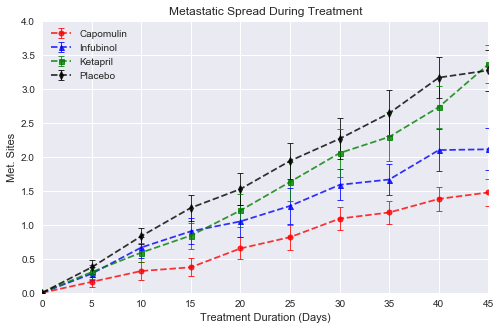

In [67]:
# Use Seaborn library to set the size and look of the plot
sns.set_style("darkgrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,5)})

# x-axis for the plot
time = np.arange(0, 50, 5)

# assign y axis data and std error to variables.
# for meta sites data
capomulin = meta_mean_unstack["Capomulin"]
infubinol = meta_mean_unstack["Infubinol"]
ketapril = meta_mean_unstack["Ketapril"]
placebo = meta_mean_unstack["Placebo"]
#for std error
capomulin_sem = meta_sem_unstack["Capomulin"]
infubinol_sem = meta_sem_unstack["Infubinol"]
ketapril_sem = meta_sem_unstack["Ketapril"]
placebo_sem = meta_sem_unstack["Placebo"]

# plot the graph and errorbars
plt.errorbar(time, capomulin, yerr=capomulin_sem, fmt='o', color='r', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Capomulin")
plt.errorbar(time, infubinol, yerr=infubinol_sem, fmt='^', color='b', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Infubinol")
plt.errorbar(time, ketapril, yerr=ketapril_sem, fmt='s', color='g', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Ketapril")
plt.errorbar(time, placebo, yerr=placebo_sem, fmt='d', color='black', alpha=0.8, capsize=3, markersize=5, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Placebo")

# set the x and y axis limits and labels, chart title and legends 
plt.xlim(0,45)
plt.ylim(0,4)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend()

# Save our graph and show the graph
plt.savefig('MetSites.png')
plt.show()

## Survival Rates

In [68]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# print the data to be used
all_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [69]:
# find the count of the mice by Drug and Timepoint and unstack the data
mice_count_df = all_data_df.groupby(["Timepoint", "Drug"])["Mouse ID"].count()
mice_count_unstack = mice_count_df.unstack()
mice_count_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,25,25
5,25,21,25,23,23,24,23,25,24,24
10,25,20,21,22,21,24,21,24,22,22
15,24,19,21,19,21,20,15,24,22,21
20,23,18,20,19,20,19,15,23,20,17
25,22,18,18,19,18,17,13,23,19,16
30,22,16,17,18,15,15,12,23,18,15
35,22,14,12,17,15,14,9,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [70]:
# convert the count to percentage as per 25 mice
# pls note that one mouse ID under Propriva was deleted(dropped) earlier due to duplicate mouse id. therefor the total of 24.
mice_count_unstack_percent_df = mice_count_unstack / 25 * 100
mice_count_unstack_percent_df["Propriva"] = mice_count_unstack["Propriva"] / 24 * 100
mice_count_unstack_percent_df["Propriva"] = mice_count_unstack_percent_df["Propriva"].map("{:,.1f}".format)
mice_count_unstack_percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,95.8,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,87.5,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,62.5,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,62.5,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.2,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,37.5,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,37.5,80.0,48.0,56.0


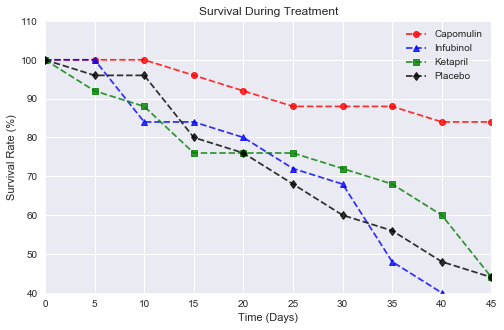

In [71]:
#Use Seaborn library to set the size and look of the plot
sns.set_style("darkgrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,5)})

#x-axis for the plot
time = np.arange(0, 50, 5)

# assign y axis data and std error to variables.
capomulin = mice_count_unstack_percent_df["Capomulin"]
infubinol = mice_count_unstack_percent_df["Infubinol"]
ketapril = mice_count_unstack_percent_df["Ketapril"]
placebo = mice_count_unstack_percent_df["Placebo"]

# plot the graph
plt.errorbar(time, capomulin, fmt='o', color='r', alpha=0.8, capsize=3, markersize=6, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Capomulin")
plt.errorbar(time, infubinol, fmt='^', color='b', alpha=0.8, capsize=3, markersize=6, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Infubinol")
plt.errorbar(time, ketapril, fmt='s', color='g', alpha=0.8, capsize=3, markersize=6, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Ketapril")
plt.errorbar(time, placebo, fmt='d', color='black', alpha=0.8, capsize=3, markersize=6, elinewidth=1,
    markeredgewidth=1, linestyle='--', label="Placebo")

# set the x and y axis limits and labels, chart title and legends     
plt.xlim(0,45)
plt.ylim(40,110)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend()

# Save our graph and show the graph
plt.savefig('SurvivalRate.png')
plt.show()

## Summary Bar Graph

In [72]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# print the data to be used
tumor_volume_unstack

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.474979,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.360148,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.538661,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,54.004459,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [73]:
# locate the first day mice count (Timepoint == 0)
first_day_data = tumor_volume_unstack.loc[0,:]

# locate the last day mice count (Timepoint == 45)
last_day_data = tumor_volume_unstack.loc[45,:]

#print(first_day_data)
#print(last_day_data)

In [74]:
# calculate the percentage of of change based on first and last day mice count
percent_volume_change = (last_day_data - first_day_data) / first_day_data * 100

# convert to a df for 4 drugs
percent_volume_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"], 
                                         "Percent Volume Change": [percent_volume_change["Capomulin"],
                                                                   percent_volume_change["Infubinol"],
                                                                   percent_volume_change["Ketapril"], 
                                                                   percent_volume_change["Placebo"]]})
percent_volume_change_df["Percent Volume Change"] = percent_volume_change_df["Percent Volume Change"].map("{:,.1f}".format)

# conver the Percent column from object to float
percent_volume_change_df["Percent Volume Change"] = pd.to_numeric(percent_volume_change_df["Percent Volume Change"])

percent_volume_change_df


,Drug,Percent Volume Change
0,Capomulin,-19.5
1,Infubinol,46.1
2,Ketapril,57.0
3,Placebo,51.3


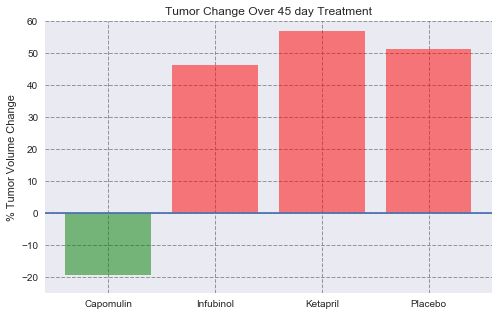

In [75]:
# Use Seaborn library to set the size and look of the plot
sns.set_style("dark", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2} 
sns.set(rc={'figure.figsize':(8,5)})

# y-axis for the plot
percent_volume_change_y = percent_volume_change_df["Percent Volume Change"]

# x-axis for the plot (for tick locations)
drugs_x = np.arange(len(percent_volume_change_y))
# (or) we can directly say
#drugs_x = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# condition for color of the bars
clrs = ['green' if (x < 0) else 'red' for x in percent_volume_change_y ]

# plot the barplot
bar_plot = plt.bar(drugs_x, percent_volume_change_y, color=clrs, alpha=0.5, align="edge")
# (Or) using seaborn
#ax = sns.barplot(x=drugs_x, y=percent_volume_change_y, palette=clrs, alpha=0.8)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in drugs_x]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# set the x and y axis limits and labels, chart title and legends 
plt.ylim(-25,60)
plt.title("Tumor Change Over 45 day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(linestyle='--', color='grey', alpha=0.8)
plt.axhline(0)

# Save our graph and show the graph
plt.savefig('PercentTumorChange.png')
plt.show()
